In [1]:
!pip install xgboost
!pip install scikit-learn



C:\Users\dell\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\dell\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None

First 5 rows:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          

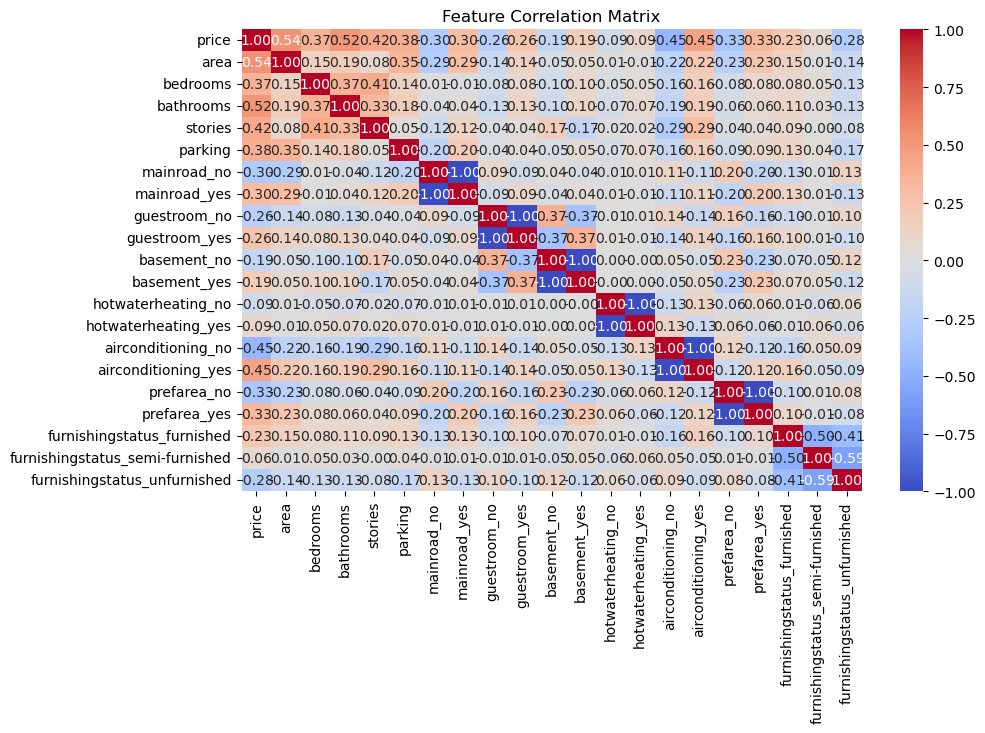

Data preprocessing completed successfully!


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
df = pd.read_csv("Housing.csv")

# Display basic info about the dataset
print("Dataset Overview:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Handle missing values
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = df.select_dtypes(exclude=[np.number]).columns.tolist()

numerical_imputer = SimpleImputer(strategy='mean')
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Feature engineering: Scaling and Encoding
scaler = StandardScaler()
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)




preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[('imputer', numerical_imputer), ('scaler', scaler)]), numerical_features),
        ('cat', Pipeline(steps=[('imputer', categorical_imputer), ('encoder', encoder)]), categorical_features)
    ]
)

# Apply preprocessing
processed_data = preprocessor.fit_transform(df)

# Convert processed data back to DataFrame
processed_df = pd.DataFrame(processed_data, columns=numerical_features + list(preprocessor.named_transformers_['cat'].named_steps['encoder'].get_feature_names_out(categorical_features)))

# Visualize correlations
plt.figure(figsize=(10, 6))
corr_matrix = processed_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()


print("Data preprocessing completed successfully!")


🔹 Training Linear Regression...

🔹 Training Decision Tree...

🔹 Training Random Forest...

🔹 Training XGBoost...

📊 Model Performance Summary:
                     RMSE     MAE      R²
Linear Regression  0.0988  0.0776  0.9962
Decision Tree      1.0408  0.8960  0.5831
Random Forest      0.5472  0.4470  0.8848
XGBoost            0.5840  0.4845  0.8687


<Figure size 1000x500 with 0 Axes>

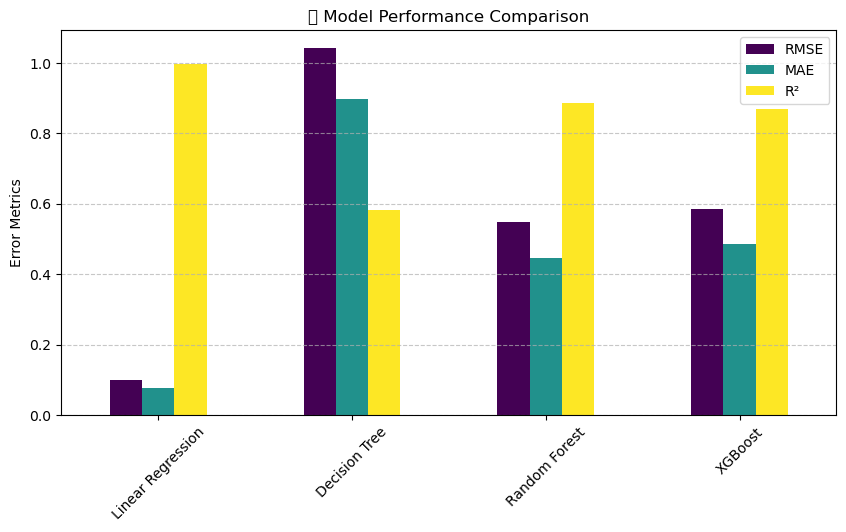

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle  # For saving the model
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Set random seed for reproducibility
np.random.seed(42)

# Generate dataset (100 samples, 5 features)
X = np.random.rand(100, 5)
true_coefficients = np.array([3, -2, 1.5, 0, 4])
y = X @ true_coefficients + np.random.normal(0, 0.1, 100)  # Adding noise

# Split dataset into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(objective="reg:squarederror", n_estimators=100, random_state=42)
}

# Hyperparameter grids for tuning
param_grids = {
    "Decision Tree": {
        "max_depth": [3, 5, 10, None],
        "min_samples_split": [2, 5, 10]
    },
    "Random Forest": {
        "n_estimators": [50, 100, 200],
        "max_depth": [3, 5, 10]
    },
    "XGBoost": {
        "learning_rate": [0.01, 0.1, 0.2],
        "max_depth": [3, 5, 7],
        "n_estimators": [50, 100]
    }
}

# Train, Evaluate, and Optimize models
results = {}
best_models = {}

for name, model in models.items():
    print(f"\n🔹 Training {name}...")

    # Hyperparameter tuning if params exist
    if name in param_grids:
        search = GridSearchCV(model, param_grids[name], cv=5, scoring='r2', n_jobs=1)
        search.fit(X_train, y_train)
        best_model = search.best_estimator_
    else:
        best_model = model.fit(X_train, y_train)

    # Save the best model
    with open(f"{name.replace(' ', '_')}.pkl", "wb") as file:
        pickle.dump(best_model, file)

    # Predictions
    y_pred = best_model.predict(X_test)

    # Evaluation Metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {"RMSE": rmse, "MAE": mae, "R²": r2}
    best_models[name] = best_model

# Convert results to DataFrame
results_df = pd.DataFrame(results).T
print("\n📊 Model Performance Summary:")
print(results_df.round(4))

# Visualize performance
plt.figure(figsize=(10, 5))
results_df.plot(kind="bar", figsize=(10, 5), colormap="viridis")
plt.title("📊 Model Performance Comparison")
plt.ylabel("Error Metrics")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(loc="upper right")
plt.show()


In [4]:
import requests

url = "http://127.0.0.1:5000/predict"

# List of models to test
models = ["Linear_Regression", "Decision_Tree", "Random_Forest", "XGBoost"]

for model_name in models:
    data = {
        "features": [1.2, 3.4, 5.6, 7.8, 9.0],
        "model": model_name
    }

    response = requests.post(url, json=data)  # Sending JSON request
    print(f"Response from {model_name}: {response.json()}")  # Print API response


Response from Linear_Regression: {'model': 'Linear_Regression', 'prediction': [15.710695408642875]}
Response from Decision_Tree: {'model': 'Decision_Tree', 'prediction': [4.7150120505726045]}
Response from Random_Forest: {'model': 'Random_Forest', 'prediction': [4.639800928689536]}
Response from XGBoost: {'model': 'XGBoost', 'prediction': [4.8464579582214355]}


In [5]:
import xgboost
import sklearn
import pandas as pd
import numpy as np

print("XGBoost Version:", xgboost.__version__)
print("Scikit-learn Version:", sklearn.__version__)
print("Pandas Version:", pd.__version__)
print("NumPy Version:", np.__version__)

XGBoost Version: 2.1.4
Scikit-learn Version: 1.3.0
Pandas Version: 2.2.3
NumPy Version: 1.24.4
